# Numerical solutions of first-order systems

Consider the first-order (coupled) system of first-order ODEs
\begin{align*}
    \frac{dy}{dt} &= f(y,z,t),\\
    \frac{dz}{dt} &= g(y,z,t)
\end{align*}
for the unknown functions $y(t)$ and $z(t)$. The familiar function ``odeint`` from ``scipy.integrate`` can be used to solve such systems numerically.

## The Volterra predator-prey model

Consider two populations (one predator species and one prey species) coexisting in an environment. Let the population of prey at time $t$ be denoted $y(t)$ and let the population of predators at time $t$ be denoted $z(t)$. The Volterra (or Lotka–Volterra) predator-prey model makes several simplifying assumptions about the population dynamics:

- In the absence of any predators, the population of prey would grow exponentially, that is, at a rate which is proportional to the current population, with constant of proportionality $a$, say.

- In the absence of any prey on which to feed, the population of predators would decay exponentially, that is, at a rate which is proportional to the current population, with constant of proportionality $b$, say.

- The growth rate of the prey population also contains a term which is proportional to the frequency of interactions between predators and prey, and hence is proportional to $yz$, with constant of proportionality $-p$, say. The more frequent the interactions between predator and prey, the smaller the growth of the prey population.

- The growth rate of the predator population also contains a term which is proportional to the frequency of interactions between predators and prey and hence is proportional to $yz$, with constant of proportionality $q$, say. The more frequent the interactions between predator and prey, the larger the growth of the predator population.

These assumptions lead us to the model
\begin{align*}
    \frac{dy}{dt} &= y(a - pz), \\
    \frac{dz}{dt} &= z(-b + qy),
\end{align*}
where $a,b,p,q$ are positive constants.

**Example 11.1.** Suppose the populations of cheetahs and gazelles obey the Volterra equations with parameters $a=1.1$, $b=0.4$, $p=0.04$, $q=0.01$ and the initial populations consisted of 100 cheetahs and 100 gazelles, with time measured in years. We can use `odeint` to plot the changing populations of cheetahs and gazelles over time as follows:

In [1]:
import math
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt

<IPython.core.display.Javascript object>


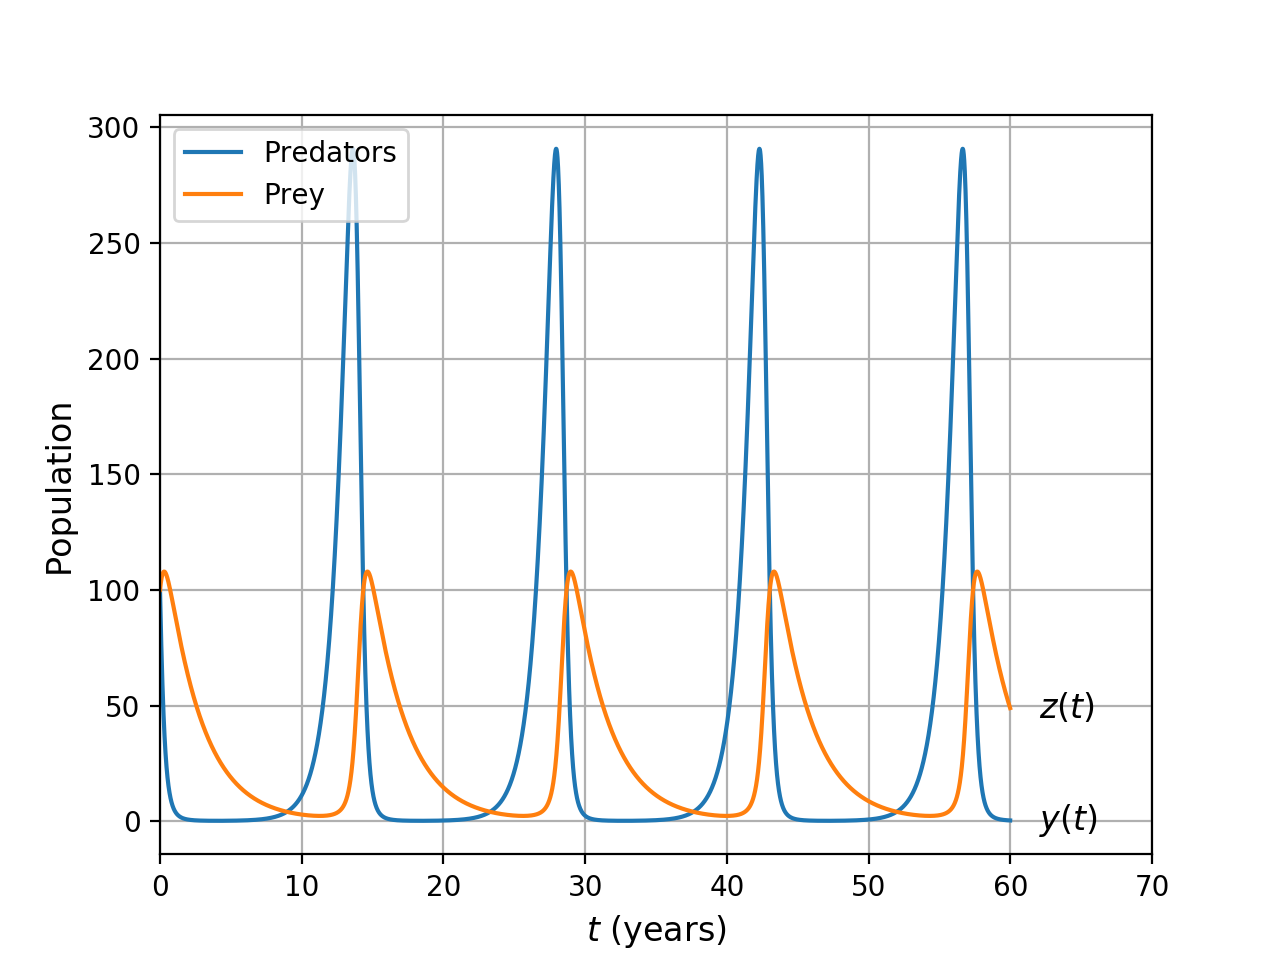

In [2]:
# enable interactive plot
%matplotlib notebook

def dU_dt(U, t): # U(t) = (y(t), z(t))
    a = 1.1
    b = 0.4
    p = 0.04
    q = 0.01
    
    y = U[0]
    z = U[1]
    dy_dt = y*(a - p*z)
    dz_dt = z*(-b + q*y)
    
    return (dy_dt, dz_dt)

y0 = 100
z0 = 100
U0 = (y0, z0)

t_range = (0, 60)
plt.figure('Figure 1: Volterra predator-prey model')
plt.xlabel('$t$ (years)', fontsize = 12)
plt.ylabel('Population', fontsize = 12)
plt.grid(True)

h = 0.01
t = np.arange(t_range[0], t_range[1], h)
U = odeint(dU_dt, U0, t) # returns (y0, z0), (y1, z1), (y2, z2), ...
y = U[:,0] # extract the first column (y points)
z = U[:,1] # extract the second column (z points)
plt.plot(t, y, label='Predators')
plt.plot(t, z, label='Prey')

margin = 2
padding = 10
plt.legend(loc = 'upper left')
plt.text(t_range[1]+margin, y[-1],'$y(t)$', fontsize = 12, va = 'center')
plt.text(t_range[1]+margin, z[-1],'$z(t)$', fontsize = 12, va = 'center')
plt.xlim(t_range[0], t_range[1]+padding)

plt.show()

Observe that both populations are periodic.

# Numerical solutions of second-order equations/systems

The function `oddeint` can also be used to solve second-order ODEs numerically. To do this, we note that the general second-order equation
$$
    \frac{d^2y}{dt^2}=G(y',y,t)
$$
for the unknown function $y(t)$ can be re-written as the coupled system
\begin{align*}
    \frac{dy}{dt}&=z,\\
    \frac{dz}{dt}&=G(y,z,t)
\end{align*}
for the unknown functions $y(t)$ and $z(t)$.

**Example 11.2.** We can plot the numerical solution to the initial value problem
$$
    \frac{d^2y}{dt^2}=-\frac{2}{t}\frac{dy}{dt}+\frac{1}{t}-1, \hspace{10mm} y(1)=2,\hspace{5mm} y'(1)=1
$$
on the interval $[1,4]$ by re-writing it as the system
\begin{align*}
    \frac{dy}{dt}&=z,\\
    \frac{dz}{dt}&=-\frac{2}{t}z+\frac{1}{t}-1
\end{align*}
with initial conditions $y(1)=2$ and $z(1)=1$.

<IPython.core.display.Javascript object>


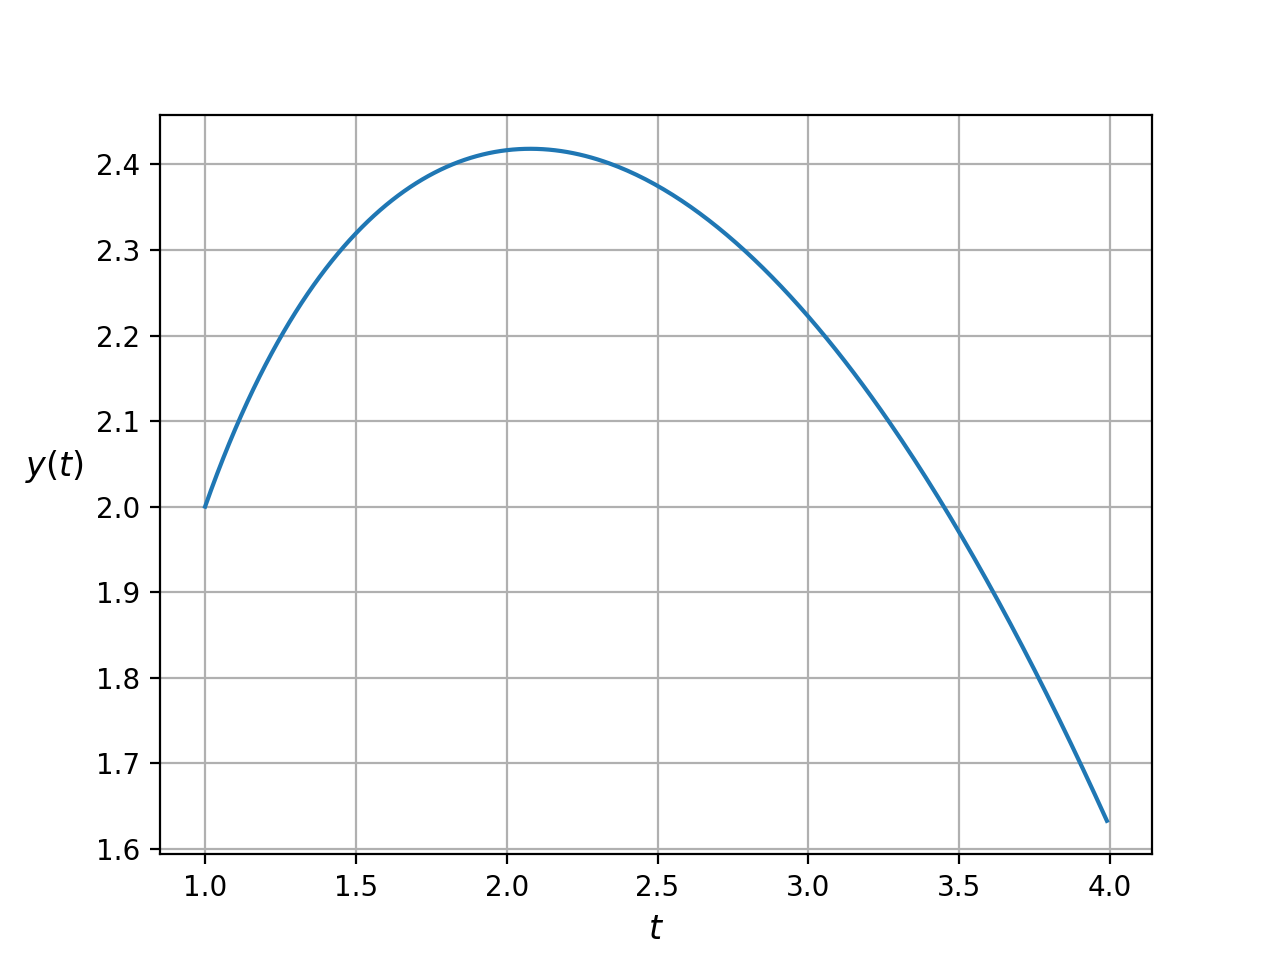

In [3]:
%matplotlib notebook

def dU_dt(U, t): # U(t) = (y(t), y'(t))
    y = U[0]
    z = U[1]
    dy_dt = z
    dz_dt = - 2/t*z + 1/t - 1
    return (dy_dt, dz_dt)

y0 = 2
z0 = 1
U0 = (y0, z0)

t_range = (1, 4)
plt.figure('Figure 2: Numerical solution of second-order ODE')
plt.xlabel('$t$', fontsize = 12)
plt.ylabel('$y(t)$', fontsize = 12, labelpad=15).set_rotation(0)
plt.grid(True)

h = 0.01
t = np.arange(t_range[0], t_range[1], h)
U = odeint(dU_dt, U0, t)
y = U[:,0] # extract the y-column from matrix U
plt.plot(t, y)

plt.show()

## Two gravitationally bound bodies

According to *Newton's law of universal gravitation*, the gravitational force between two bodies is equal to
$$
    F=\frac{Gm_1m_2}{R^2},
$$
where $m_1$ and $m_2$ are the masses of the bodies, $R$ is the distance between them and
$$
    G = 6.6743\times10^{-11} \text{ N m}^2 \text{ kg}^{-2}
$$
is the *universal gravitational constant*.

In two dimensions, we can simulate a system of two gravitationally bound bodies using a system of 8 coupled differential equations:

<IPython.core.display.Javascript object>


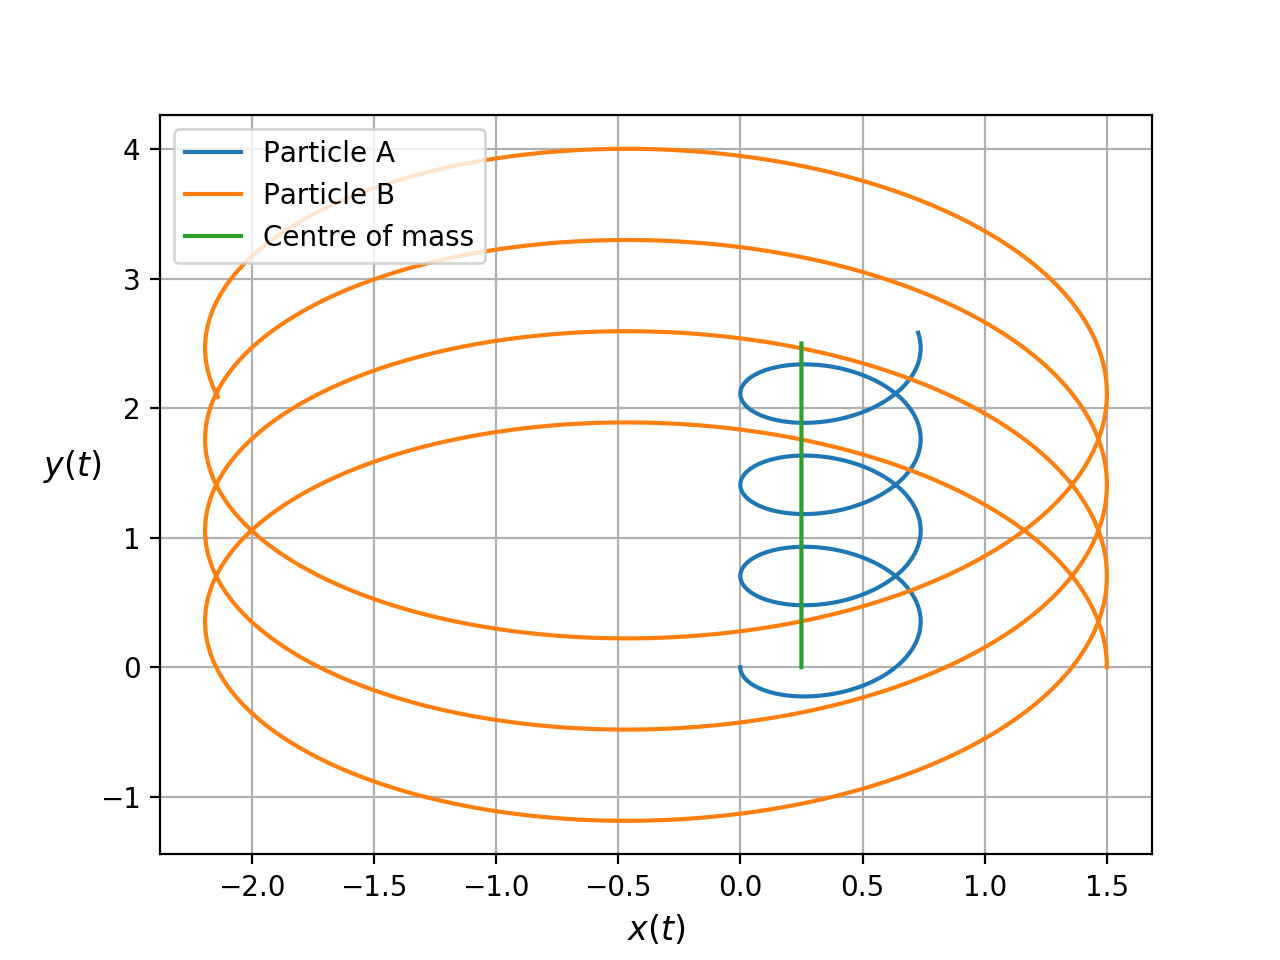

In [4]:
%matplotlib notebook

G = 1 # only off by 10 orders of magnitude!

# masses of the particles
m_a = 5
m_b = 1

# initial conditions (position and momentum) for particle A
r0_a = (0, 0)
p0_a = (0, -1.5)

# initial conditions for particle B
r0_b = (1.5, 0)
p0_b = (0, 2.0) # total momentum of the system is upwards

# initial conditions for the system
# odeint only works on one-dimensional arrays
U0 = np.array((r0_a, p0_a, r0_b, p0_b)).flatten()

def dU_dt(U, t):
    r_a, p_a = U[0:2], U[2:4]
    r_b, p_b = U[4:6], U[6:8]
    
    # definition of momentum
    dr_a = p_a / m_a
    dr_b = p_b / m_b
    
    # forces on the particles
    R = np.linalg.norm(r_a - r_b)
    Fg = G * m_a * m_b / R**2
    
    # force on particle A acts along the unit vector from A to B
    F_a = (r_b - r_a) / R * Fg
    F_b = (r_a - r_b) / R * Fg
    
    # the rate of change of momentum equals force
    dp_a = F_a
    dp_b = F_b
    
    return np.array((dr_a, dp_a, dr_b, dp_b)).flatten()

t_range = (0, 30)
plt.figure('Figure 3: Simulation of gravitational bodies')
plt.xlabel('$x(t)$', fontsize = 12)
plt.ylabel('$y(t)$', fontsize = 12, labelpad = 10).set_rotation(0)
plt.grid(True)

t = np.linspace(*t_range, 1600) # the * operator unpacks the tuple
U = odeint(dU_dt, U0, t).T # transpose the array

# unpack the odeint solution into the position and momentum vectors
r_a, p_a = U[0:2], U[2:4]
r_b, p_b = U[4:6], U[6:8]

# compute the centre of mass
r_COM = (m_a*r_a + m_b*r_b) / (m_a + m_b)

plt.plot(*r_a, label='Particle A')
plt.plot(*r_b, label='Particle B')
plt.plot(*r_COM, label='Centre of mass')

plt.legend(loc = 'upper left')
plt.show()

We can even animate our particles:

<IPython.core.display.Javascript object>


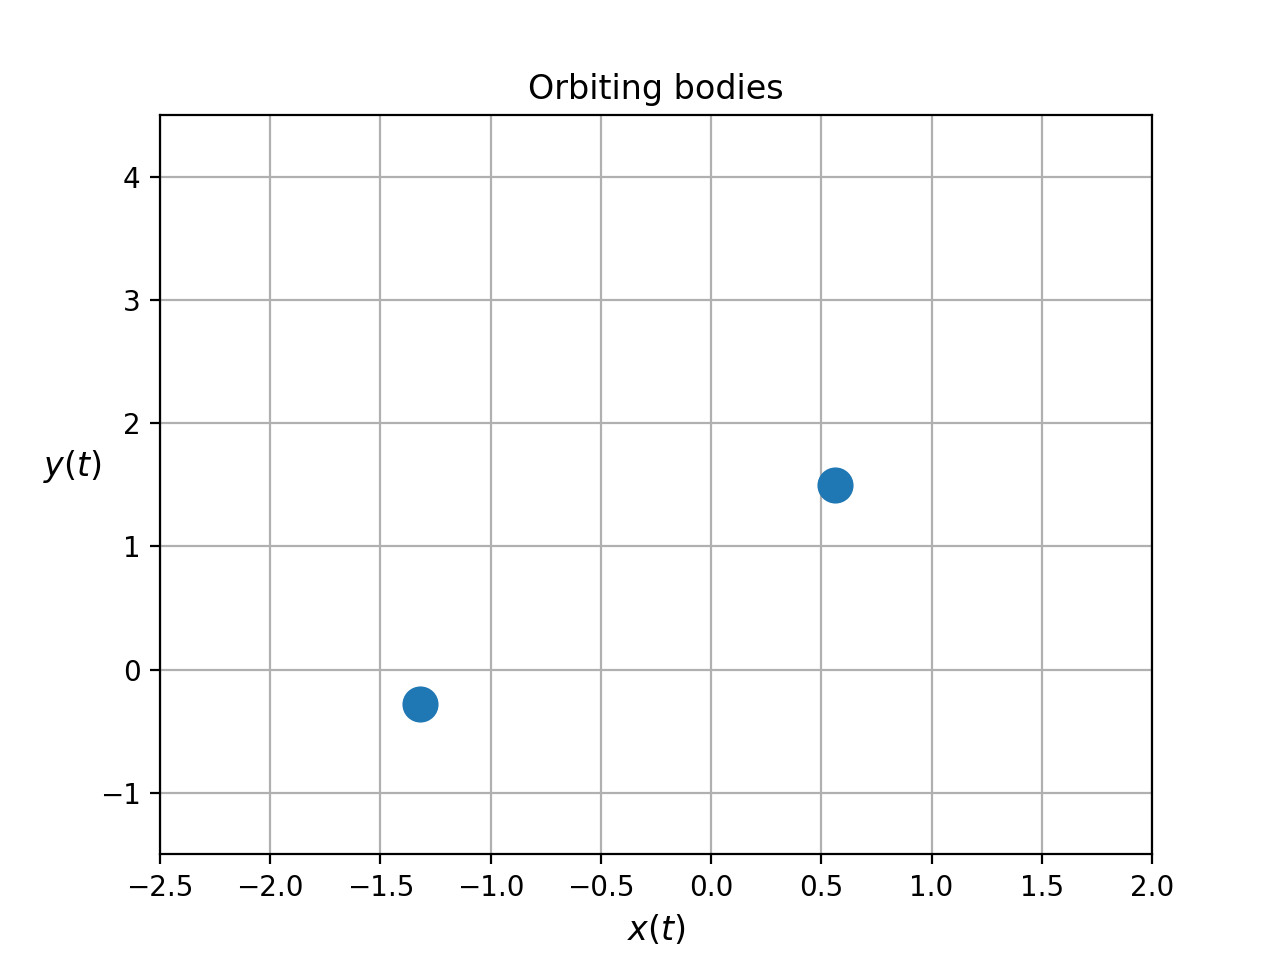

In [5]:
%matplotlib notebook

from matplotlib.animation import FuncAnimation

fig = plt.figure('Figure 4: Animation of simulated gravitational bodies')
ax = plt.axes(xlim = (-2.5, 2), ylim = (-1.5, 4.5))
# initially-empty plot using large o-shaped markers to represent
# the gravitational bodies
particles, = ax.plot([], [], 'o', markersize = 12)

plt.grid(True)
plt.title('Orbiting bodies')
plt.xlabel('$x(t)$', fontsize = 12)
plt.ylabel('$y(t)$', fontsize = 12, labelpad = 10).set_rotation(0)

def animate(i):
    # at frame mumber i, set the plot data to consist of only two points,
    # namely the positions of the two bodies at time t = 4i
    # (not aminating every computed timestep improves performance)
    particles.set_data([r_a[0][4*i], r_b[0][4*i]], [r_a[1][4*i], r_b[1][4*i]])
    
    return particles, # returns a tuple with empty second value

# 400 total frames, 20 ms apart (8 seconds @ 50 fps)
# blit = True speeds up rendering by not re-rendering unchanged elements
anim = FuncAnimation(fig, animate, frames = 400, interval = 20, blit = True)

plt.show()

# also possible to render to an a animated gif if desired
#anim.save('particles.gif', writer='pillow')

# Problems

## Problem one

For the cheetah-gazelle example:

**(a)** In the $(y,z)$-plane, plot the parametric curve $(y(t),z(t))$ for some appropriate range of $t$. What do you think an appropriate maximum value for $t$ would be (remember, the populations are periodic)?
**Note:** What you have just drawn is called the *phase portrait* of the system.

**(b)** Experiment by changing the initial populations and observing how the phase portrait changes (if you draw these on the same plot, you should see a family of concentric, closed curves).

**(c)** Based on your experimentation in (b), can you estimate the pair of stable populations $(x^*,y^*)$, that is, the pair of populations such that, if $y(0)=y^*$ and $z(0)=z^*$, then $y(t)=y^*$ and $z(t)=z^*$ for all $t\geq0$.

**(d)** Find the precise values of the stable populations using the Volterra equations (note that extinction is one solution).

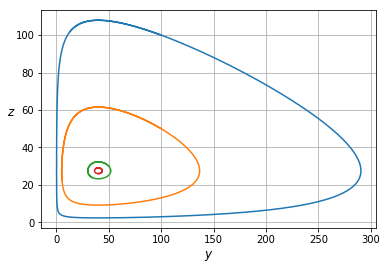

In [7]:
%matplotlib inline

def dU_dt(U, t):
    a = 1.1
    b = 0.4
    p = 0.04
    q = 0.01
    
    y = U[0]
    z = U[1]
    dy_dt = y*(a - p*z)
    dz_dt = z*(-b + q*y)
    
    return (dy_dt, dz_dt)

t_range = (0, 15)
plt.grid(True)
plt.xlabel('$y$', fontsize = 12)
plt.ylabel('$z$', fontsize = 12).set_rotation(0)

h = 0.01
t = np.arange(t_range[0], t_range[1], h)
for U0 in [(100, 100), (100, 50), (50, 30), (40, 26)]:
    U = odeint(dU_dt, U0, t) # returns (y0, z0), (y1, z1), (y2, z2), ...
    y = U[:,0]
    z = U[:,1]
    plt.plot(y, z)

plt.show()

If we reject the extinction solution $y=z=0$, setting the Volterra differential equations equal to zero gives
\begin{align*}
    y &= \frac{b}{q}=40,\\
    z &= \frac{a}{p}=27.5.
\end{align*}
as the stable populations.

## Problem two

Plot the numerical solution to the initial-value problem
$$
    \frac{d^2y}{dt^2}=-y \left( \frac{dy}{dt} \right)^2, \hspace{10mm} y(0)=0, \hspace{5mm} y'(0)=1
$$
for $0\leq t \leq 10$.

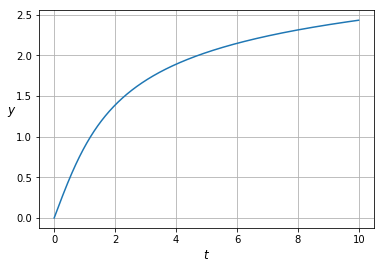

In [8]:
%matplotlib inline

def dU_dt(U, t):
    y = U[0]
    z = U[1]
    dy_dt = z
    dz_dt = -y * z**2
    return (dy_dt, dz_dt)

y0 = 0
z0 = 1
U0 = (y0, z0)

t_range = (0, 10)
plt.grid(True)
plt.xlabel('$t$', fontsize = 12)
plt.ylabel('$y$', fontsize = 12).set_rotation(0)

h = 0.01
t = np.arange(t_range[0], t_range[1], h)
U = odeint(dU_dt, U0, t)
y = U[:,0]
plt.plot(t, y)

plt.show()

## Problem three

**(a)** Consider a body of mass $m$ orbiting a larger, central body of mass $M$, where $M\gg m$. In the reference frame of the larger body, determine an initial velocity vector for the smaller body which results in the smaller body undergoing uniform circular motion at radius $R$ from the larger body. **Note:** such an orbit is called a *circular orbit*.

**(b)** Use the gravitational simulation code above to simulate a circular orbit in the reference frame of the central body. By slightly changing the initial velocity of the orbiting body, observe that an elliptical orbit results (there is no need to prove that the observed shape is an ellipse).

**(c)** Modify the gravitational simulation code to simulate three gravitational bodies. Try to simulate a moon in orbit around a planet, which in turn is in orbit around a star. 

**Bonus problem:** If you are relatively comfortable with coding, see if you can modify the gravitational simulation code to accept an arbitrary number of gravitational bodies.